### Resultados simulaciones ElFarol (versión de Brian Arthur)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos de las simulaciones...

In [107]:
names=['Identificador','Ronda','Agente','Estado','Puntaje','Politica']
#data = pd.read_csv('data/agentes.csv')#,names=names,header=None)
data = pd.read_csv('data/simulacion-10-4.csv')#,names=names,header=None)
data.head()

,Memoria,Num_predic,Identificador,Ronda,Agente,Estado,Puntaje,Politica
0,10,4,A,0,0,1,1,3-ventana-espejo
1,10,4,A,1,0,1,-1,3-ciclico-espejo
2,10,4,A,2,0,1,-1,10-ventana-espejo
3,10,4,A,3,0,1,1,10-ventana-espejo
4,10,4,A,4,0,1,-1,3-ciclico-espejo


**Asistencia**

In [105]:
numero_agentes = data['Agente'].max() + 1
aux = data.groupby(['Ronda'])['Estado'].sum().reset_index()
aux.columns = ['Ronda', 'Asistencia_total']
aux['Asistencia_total'] = (aux['Asistencia_total']/numero_agentes)*100
aux.head(10)

,Ronda,Asistencia_total
0,0,53.0
1,1,100.0
2,2,5.0
3,3,33.0
4,4,75.0
5,5,94.0
6,6,98.0
7,7,72.0
8,8,39.0
9,9,81.0


Text(0, 0.5, 'Asistencia al bar')

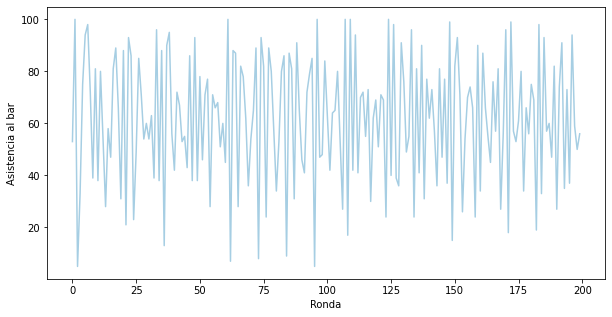

In [106]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x=aux['Ronda'], y=aux['Asistencia_total'])
plt.xlabel('Ronda')
plt.ylabel('Asistencia al bar')

#### Asistencia óptima

Text(0, 0.5, 'Asistencia óptima')

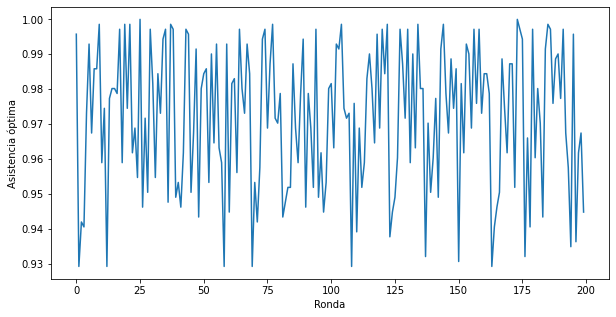

In [84]:
aux = data.groupby(['Ronda'])['Estado'].sum().reset_index()
aux.columns = ['Ronda', 'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (aux['Asistencia'] - 0.5)*(aux['Asistencia'] - 0.5)
num_rondas = aux.Ronda.max() + 1
aux['Asistencia_optima'] = aux['diferencia_con_umbral']/num_rondas
aux['Asistencia_optima'] = 1 - 2 * np.sqrt(aux['Asistencia_optima'])
fig = plt.subplots(figsize=(10,5))
sns.lineplot(x=aux['Ronda'], y=aux['Asistencia_optima'])
plt.xlabel('Ronda')
plt.ylabel('Asistencia óptima')

#### Recompensa total

In [85]:
data_aux = data.copy()
data_aux = data_aux.groupby(['Agente'])['Puntaje'].mean().reset_index()
data_aux = data_aux.sort_values(by='Puntaje').reset_index()
data_aux.head()

,index,Agente,Puntaje
0,25,25,-0.310
1,36,36,-0.310
2,43,43,-0.305
3,5,5,-0.305
4,48,48,-0.295


Text(0, 0.5, 'Puntaje')

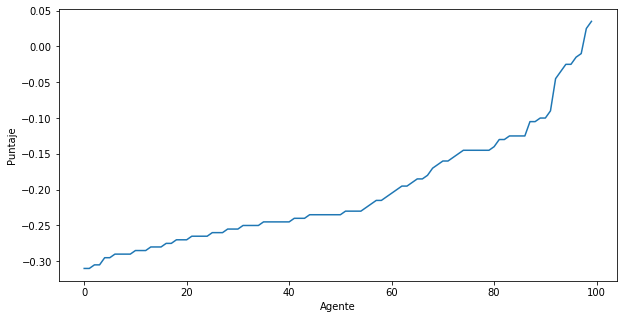

In [86]:
fig = plt.subplots(figsize=(10,5))
sns.lineplot(
    x=data_aux.index, 
    y=data_aux['Puntaje']
)
plt.xlabel('Agente')
plt.ylabel('Puntaje')

#### Distribución de la recompensa

In [87]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 0
    return np.round(gini,3)

In [88]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.sort_values(by='Puntaje normalizado').reset_index()
gini1(data_aux['Puntaje normalizado'])

0.055

In [89]:
data_aux = data.copy()
data_aux = data_aux.groupby(['Politica'])['Puntaje'].mean().reset_index()
data_aux = data_aux.sort_values(by='Puntaje').reset_index()
data_aux.head()

,index,Politica,Puntaje
0,2,1-ventana,-0.397059
1,4,10-ciclico,-0.350000
2,20,5-ciclico-espejo,-0.305556
3,11,3-ciclico,-0.295455
4,13,3-ventana,-0.277442


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 <a list of 39 Text major ticklabel objects>)

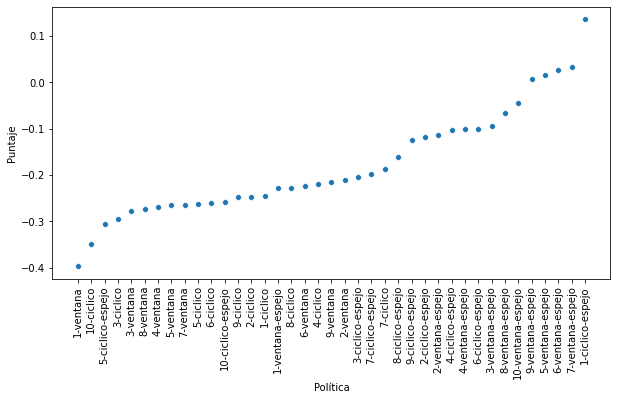

In [90]:
fig = plt.subplots(figsize=(10,5))
sns.scatterplot(
    x=data_aux['Politica'], 
    y=data_aux['Puntaje']
)
plt.xlabel('Política')
plt.ylabel('Puntaje')
plt.xticks(rotation=90)

In [94]:
df = pd.DataFrame(data.groupby(['Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Ronda','Politica', 'cantidad_agentes']
df = df.groupby(['Ronda','Politica'])['cantidad_agentes'].mean().reset_index()
df.head(2)

,Ronda,Politica,cantidad_agentes
0,0,1-ciclico,2
1,0,1-ciclico-espejo,4


Text(0, 0.5, 'Cantidad total de agentes')

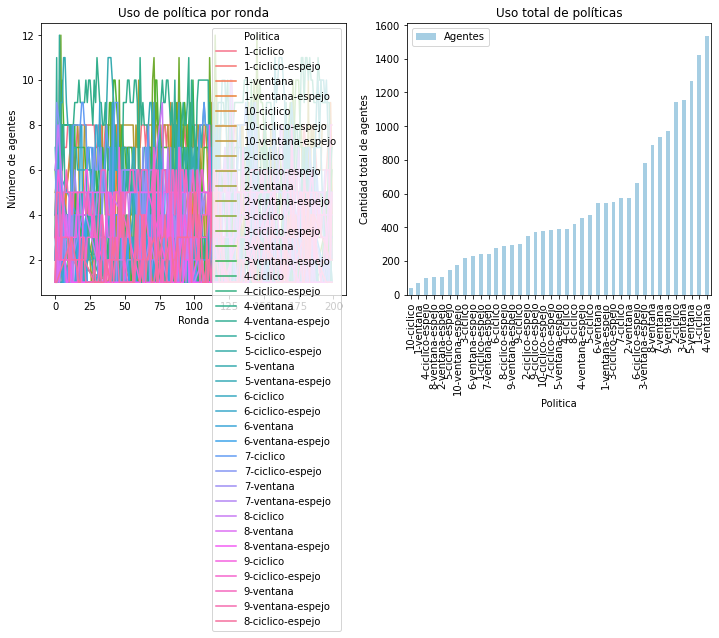

In [102]:
sns.set_palette("Paired")
fig, ax = plt.subplots(1,2,figsize = (12,5))
sns.lineplot(
        x=df['Ronda'], 
        y=df['cantidad_agentes'],
        hue=df['Politica'],
        ax=ax[0]
    )
ax[0].set_title('Uso de política por ronda')
ax[0].set_ylabel('Número de agentes')
df1 = pd.DataFrame(data.groupby('Politica')['Agente'].count())
df1.columns = ['Agentes']
df1.sort_values(by='Agentes',inplace=True)
df1.plot(kind="bar", ax = ax[1])
ax[1].set_title('Uso total de políticas')
ax[1].set_ylabel('Cantidad total de agentes')
#fig.suptitle('Grafo: ' + str(r), fontsize=14)